<a href="https://colab.research.google.com/github/Muhammad-Azham-Oman/AI_Portfolio/blob/main/game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [ ]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(16719, 16)

In [ ]:
data.drop(columns=['Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Count','User_Count','Developer'],inplace=True)

In [ ]:
data.head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,31.37,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Global_Sales     16719 non-null  float64
 5   Critic_Score     8137 non-null   float64
 6   User_Score       10015 non-null  object 
 7   Rating           9950 non-null   object 
dtypes: float64(3), object(5)
memory usage: 1.0+ MB


In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7878 entries, 0 to 16706
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7878 non-null   object 
 1   Platform         7878 non-null   object 
 2   Year_of_Release  7878 non-null   float64
 3   Genre            7878 non-null   object 
 4   Global_Sales     7878 non-null   float64
 5   Critic_Score     7878 non-null   float64
 6   User_Score       7878 non-null   object 
 7   Rating           7878 non-null   object 
dtypes: float64(3), object(5)
memory usage: 553.9+ KB


In [ ]:
for i in data['User_Score']:
  if i == 'tbd':
    data['User_Score'] = data['User_Score'].replace(i,np.nan)
data['User_Score'] = pd.to_numeric(data['User_Score'])

/tmp/ipython-input-3101375613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['User_Score'] = data['User_Score'].replace(i,np.nan)


In [ ]:
data.isna().sum()

,0
Name,0
Platform,0
Year_of_Release,0
Genre,0
Global_Sales,0
Critic_Score,0
User_Score,1052
Rating,0


In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6826 entries, 0 to 16706
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6826 non-null   object 
 1   Platform         6826 non-null   object 
 2   Year_of_Release  6826 non-null   float64
 3   Genre            6826 non-null   object 
 4   Global_Sales     6826 non-null   float64
 5   Critic_Score     6826 non-null   float64
 6   User_Score       6826 non-null   float64
 7   Rating           6826 non-null   object 
dtypes: float64(4), object(4)
memory usage: 480.0+ KB


In [ ]:
original_data = data.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

data['Platform'] = LabelEncoder().fit_transform(data['Platform'])
data['Genre'] = LabelEncoder().fit_transform(data['Genre'])
data['Rating'] = LabelEncoder().fit_transform(data['Rating'])

/tmp/ipython-input-3870729846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Platform'] = LabelEncoder().fit_transform(data['Platform'])
/tmp/ipython-input-3870729846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Genre'] = LabelEncoder().fit_transform(data['Genre'])
/tmp/ipython-input-3870729846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
data.head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,User_Score,Rating
0,Wii Sports,12,2006.0,10,82.53,76.0,8.0,1
2,Mario Kart Wii,12,2008.0,6,35.52,82.0,8.3,1
3,Wii Sports Resort,12,2009.0,10,32.77,80.0,8.0,1
6,New Super Mario Bros.,2,2006.0,4,29.80,89.0,8.5,1
7,Wii Play,12,2006.0,3,28.92,58.0,6.6,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler_data = scaler.fit_transform(data[['Platform','Year_of_Release','Genre','Global_Sales','Critic_Score','User_Score','Rating']])

In [ ]:
scaled = pd.DataFrame(scaler_data,columns=['Platform_scaled','Year_of_Release_scaled','Genre_scaled','Global_Sales_scaled','Critic_Score_scaled','User_Score_scaled','Rating_scaled'])

In [ ]:
data = data.drop(columns=['Platform','Year_of_Release','Genre','Global_Sales','Critic_Score','User_Score','Rating'])

In [ ]:
scaled.index = data.index
df = pd.concat([data , scaled],axis=1)

In [ ]:
df.isna().sum()

,0
Name,0
Platform_scaled,0
Year_of_Release_scaled,0
Genre_scaled,0
Global_Sales_scaled,0
Critic_Score_scaled,0
User_Score_scaled,0
Rating_scaled,0


In [ ]:
df.head()

,Name,Platform_scaled,Year_of_Release_scaled,Genre_scaled,Global_Sales_scaled,Critic_Score_scaled,User_Score_scaled,Rating_scaled
0,Wii Sports,0.795571,-0.341332,1.286348,41.643122,0.413235,0.565719,-1.189911
2,Mario Kart Wii,0.795571,0.133631,0.236946,17.697149,0.845842,0.773962,-1.189911
3,Wii Sports Resort,0.795571,0.371113,1.286348,16.296353,0.701640,0.565719,-1.189911
6,New Super Mario Bros.,-1.536145,-0.341332,-0.287755,14.783493,1.350550,0.912791,-1.189911
7,Wii Play,0.795571,-0.341332,-0.550106,14.335238,-0.884586,-0.406084,-1.189911


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6826 entries, 0 to 16706
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    6826 non-null   object 
 1   Platform_scaled         6826 non-null   float64
 2   Year_of_Release_scaled  6826 non-null   float64
 3   Genre_scaled            6826 non-null   float64
 4   Global_Sales_scaled     6826 non-null   float64
 5   Critic_Score_scaled     6826 non-null   float64
 6   User_Score_scaled       6826 non-null   float64
 7   Rating_scaled           6826 non-null   float64
dtypes: float64(7), object(1)
memory usage: 480.0+ KB


In [ ]:
data_f = df.drop(columns=['Name'])

In [ ]:
data_f.head()

,Platform_scaled,Year_of_Release_scaled,Genre_scaled,Global_Sales_scaled,Critic_Score_scaled,User_Score_scaled,Rating_scaled
0,0.795571,-0.341332,1.286348,41.643122,0.413235,0.565719,-1.189911
2,0.795571,0.133631,0.236946,17.697149,0.845842,0.773962,-1.189911
3,0.795571,0.371113,1.286348,16.296353,0.701640,0.565719,-1.189911
6,-1.536145,-0.341332,-0.287755,14.783493,1.350550,0.912791,-1.189911
7,0.795571,-0.341332,-0.550106,14.335238,-0.884586,-0.406084,-1.189911


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sse = []
for k in range(1,10):
  km = KMeans(n_clusters=k)
  km.fit(data_f)
  sse.append(km.inertia_)

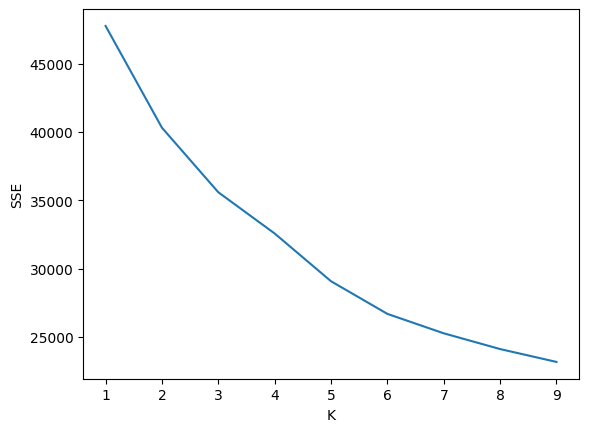

In [ ]:
plt.plot(range(1,10),sse)
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

In [ ]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [ ]:
y_pred = km.fit_predict(data_f)

In [ ]:
y_pred

array([1, 1, 1, ..., 3, 2, 1], dtype=int32)

In [ ]:
original_data['cluster'] = y_pred

In [ ]:
original_data.head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,User_Score,Rating,cluster
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,8.0,E,1
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,8.3,E,1
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,8.0,E,1
6,New Super Mario Bros.,DS,2006.0,Platform,29.80,89.0,8.5,E,0
7,Wii Play,Wii,2006.0,Misc,28.92,58.0,6.6,E,1


In [ ]:
def recommend_games(game_name, def_data, n_recommendations=5):
    if game_name not in def_data['Name'].values:
        return "Game not found."

    game_cluster = def_data[def_data['Name'] == game_name]['cluster'].values[0]

    recommendations = def_data[
        (def_data['cluster'] == game_cluster) &
        (def_data['Name'] != game_name)
    ].sample(n=n_recommendations)

    return recommendations[['Name', 'Platform', 'Genre', 'Global_Sales']]


In [ ]:
original_data['Name'].unique()

array(['Wii Sports', 'Mario Kart Wii', 'Wii Sports Resort', ...,
       'E.T. The Extra-Terrestrial', 'Breach', 'STORM: Frontline Nation'],
      dtype=object)

In [ ]:
original_data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales',
       'Critic_Score', 'User_Score', 'Rating', 'cluster'],
      dtype='object')

In [ ]:
recommend_games('Breach',original_data)

,Name,Platform,Genre,Global_Sales
7791,Fighter Within,XOne,Fighting,0.19
10169,XXX,GBA,Action,0.11
13735,Star Trek: Shattered Universe,XB,Simulation,0.04
8483,Leisure Suit Larry: Box Office Bust,X360,Adventure,0.16
9018,Casper: Spirit Dimensions,PS2,Platform,0.14


In [ ]:
recommend_games('Call of Duty: Black Ops',original_data)

,Name,Platform,Genre,Global_Sales
5640,Prey,X360,Shooter,0.32
3166,NHL 13,PS3,Sports,0.64
230,Animal Crossing: City Folk,Wii,Simulation,4.62
7655,Dave Mirra Freestyle BMX 2,XB,Sports,0.20
10190,Karaoke Revolution Presents American Idol Encore,X360,Misc,0.11


In [ ]:
original_data.to_csv("final_clustered_games.csv", index=False)